# Import Libraries, path and pickle data

In [1]:
# Load librariers
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Imported path
path = r'/Users/james/Desktop/Instacart Basket Analysis'

In [3]:
#import dataset prepared data set
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_basket_merged.pkl'))

In [4]:
#check import
df.head(5)

,user_id,first_name,last_name,sex,STATE,age,date_joined,n_dependants,fam_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Least busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [5]:
#check shape of data
df.shape

(32404859, 33)

In [6]:
#Checking the column titles
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                     Dtype   
---  ------                     -----   
 0   user_id                    int64   
 1   first_name                 object  
 2   last_name                  object  
 3   sex                        object  
 4   STATE                      object  
 5   age                        int64   
 6   date_joined                object  
 7   n_dependants               int64   
 8   fam_status                 object  
 9   income                     int64   
 10  order_id                   int64   
 11  eval_set                   object  
 12  order_number               int64   
 13  orders_day_of_week         int64   
 14  order_hour_of_day          int64   
 15  days_since_previous_order  float64 
 16  product_id                 int64   
 17  add_to_cart_order          int64   
 18  reordered                  int64   
 19  product_name       

# Bar CHart 

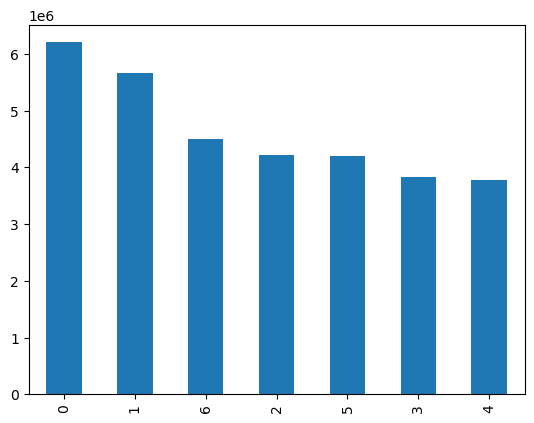

In [7]:
#create and plot a bar graph
bar_graph =df ['orders_day_of_week'].value_counts().plot.bar()

In [8]:
# save graph
bar_graph.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_bar.png'))

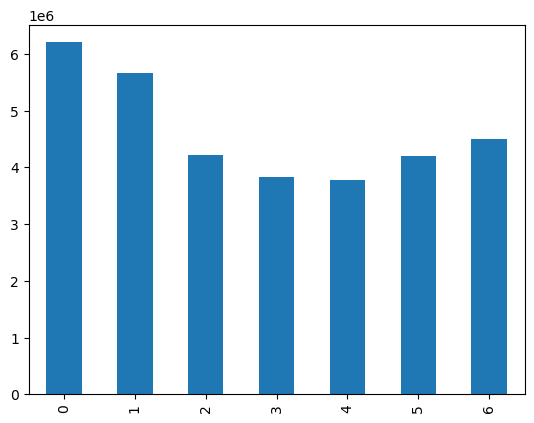

In [12]:
#Sorting the bar chart according to their index order
bar_2 = df ['orders_day_of_week'].value_counts().sort_index().plot.bar()

# Histogram 

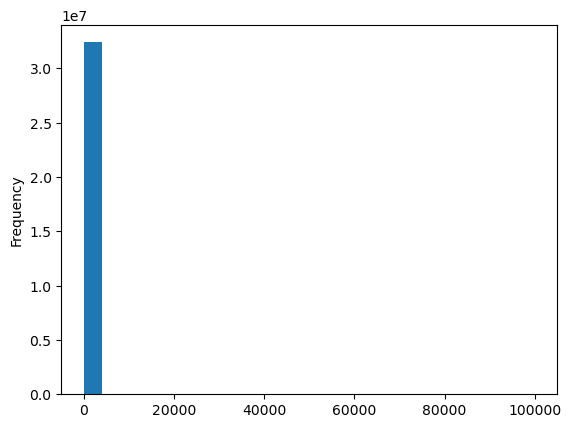

In [14]:
#Histogram for prices column
hist_1 = df['prices'].plot.hist(bins = 25)

# Scatterplot 

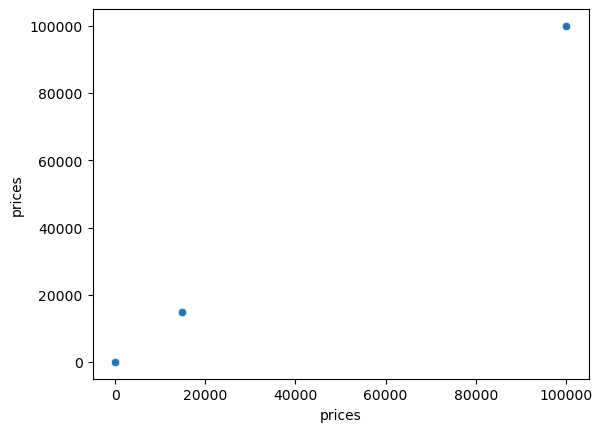

In [15]:
#Scatterplot of the prices column
scat = sns.scatterplot(x = 'prices', y = 'prices',data = df)

# Create Subset 

In [25]:
#check shape of data
df.shape

(32404859, 33)

In [26]:
df_subset = df[:1000000]
df_subset.head(10)
df_subset.shape

(1000000, 33)

# Create Outlier Function 

In [27]:
# Create an outlier function to identify the outliers for our price
def find_outliers_IQR(df):

   q1 = df.quantile(0.25)

   q3 = df.quantile(0.75)

   IQR = q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [28]:
outliers = find_outliers_IQR(df_subset['prices'])

In [29]:
print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

number of outliers: 4641
max outlier value: 99999.0
min outlier value: 21.7


In [30]:
#turn into nas
df_subset.loc[df_subset['prices'] >100, 'prices'] = np.nan

In [31]:
#check max balue in prices column now afterusing nas
df_subset['prices'].max()

25.0

# New Charts with Subset 

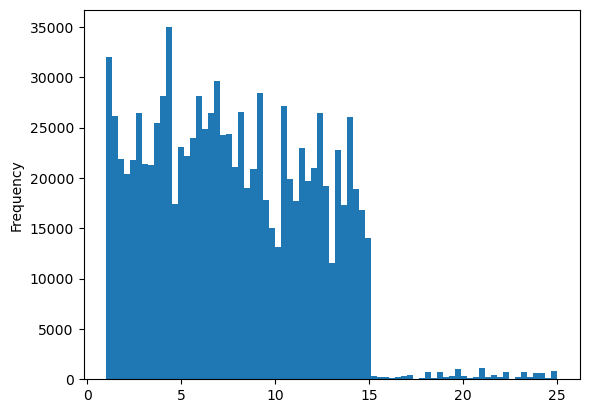

In [32]:
#create new histogram with the subset data
Hist_graph = df_subset['prices'].plot.hist(bins = 75)

In [33]:
#save bar chart image 
Hist_graph.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_hist_new.png'))

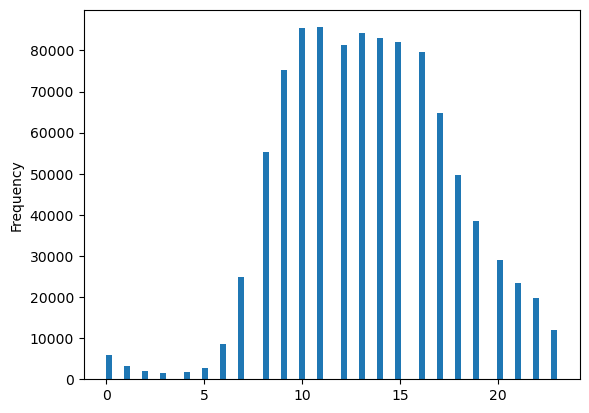

In [34]:
#histogram with the subset data
Hist_order_hour = df_subset['order_hour_of_day'].plot.hist(bins = 75)

In [35]:
#export histogram image 
Hist_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_hist1.png'))

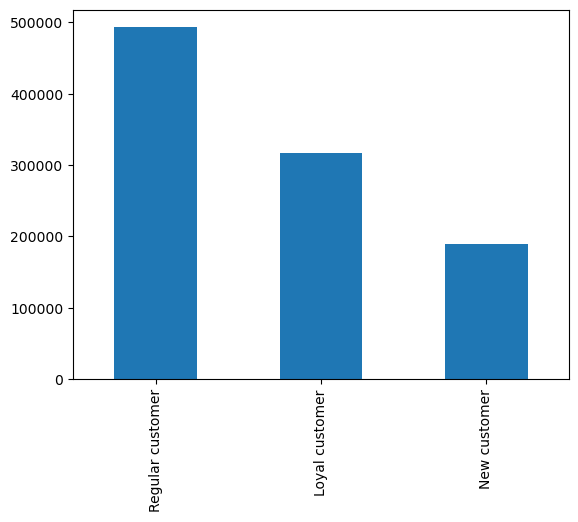

In [36]:
#create and plot a bar graph for loyalty
bar_graph1 = df_subset['loyalty_flag'].value_counts().plot.bar()

In [37]:
#export  
bar_graph1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_loyalty.png'))

In [38]:
#create random sample of data to create this line chart
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [39]:
#create two samples 'big and small'
big = df[dev]
small = df[~dev]

In [40]:
len(df)

32404859

In [41]:
len(big)+len(small)

32404859

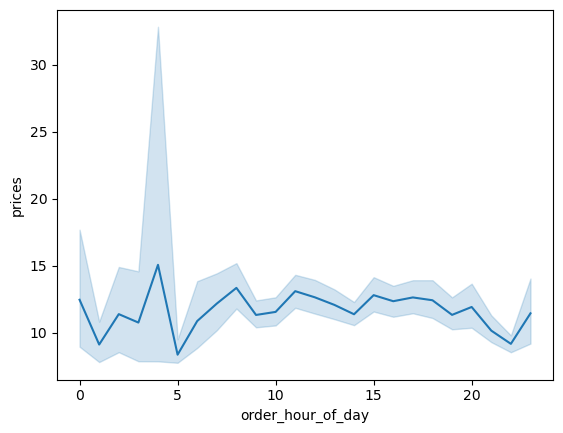

In [42]:
#plot line graph
line_plot = sns.lineplot(data = small, x = 'order_hour_of_day',y = 'prices')

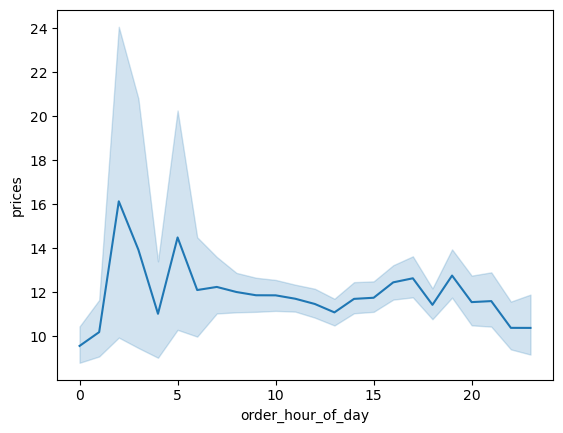

In [43]:
#plot line graph
line_plot = sns.lineplot(data = big, x = 'order_hour_of_day',y = 'prices')
# note that more expensive products purchased in early house of day # 

In [44]:
#export image  
line_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_linesmall.png'))

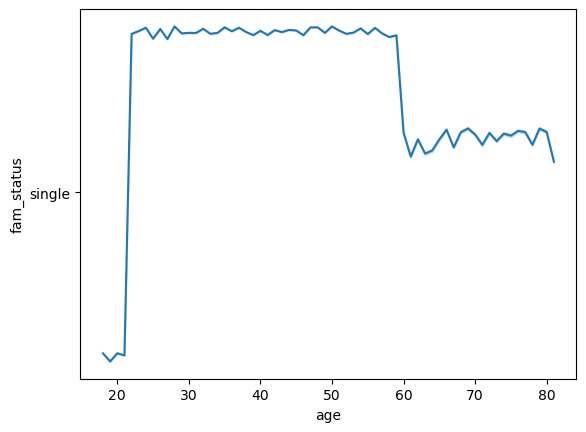

In [45]:
# check marital status 
line_plot_age = sns.lineplot(data = small, x = 'age',y = 'fam_status')


In [46]:
#export image  
line_plot_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_linesmall_age.png'))

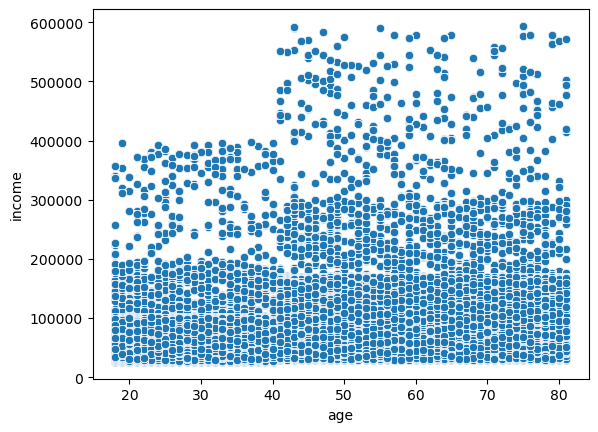

In [47]:
# Scatterplot based on age vs income # 
scatter_plot = sns.scatterplot(x = 'age', y = 'income',data = small)


In [48]:
#export scatter 
scatter_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_scatter_1000000.png'))